In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score

from sklearn.ensemble import RandomForestClassifier



#roc_auc_score: Medir Area Bajo Curva Roc
# A = 1 muy bueno
# A = 0.5 no es capaz de clasificar
# A = 0 clasifica inversamente.

In [224]:
#path = 'C:\Users\Juan Jose Restrepo\Desktop\IA\Corte 1\Curva ROC\datosCurvaRoc.csv'
#data = pd.read_csv(r'C:\Users\Juan Jose Restrepo\Desktop\IA\Corte 1\Curva ROC\datosCurvaRoc.xlsx', sheet_name='Datos', header=1)
#data.columns = ['Muestra #', 'Etiqueta', 'Prediccion']
#data.head()

data = pd.read_excel(r'C:\Users\Juan Jose Restrepo\Desktop\IA\Corte 1\Curva ROC\datosCurvaRoc.xlsx', sheet_name='Datos', header=1)
data


,Muestra #,Etiqueta,Prediccion
0,1,1,0.40
1,2,0,0.90
2,3,1,0.85
3,4,1,0.30
4,5,1,0.87
5,6,0,0.60
6,7,0,0.20
7,8,0,0.96
8,9,1,0.78
9,10,0,0.50


In [225]:
data.shape

(20, 3)

In [226]:
data.columns

Index(['Muestra #', 'Etiqueta', 'Prediccion'], dtype='object')

In [227]:
data.isnull().sum()

Muestra #     0
Etiqueta      0
Prediccion    0
dtype: int64

In [228]:
etiquetas = data['Etiqueta'].unique()
etiquetas

array([1, 0], dtype=int64)

Vemos la cantidad de muestras por etiquetas

In [229]:
data['Etiqueta'].value_counts()

1    11
0     9
Name: Etiqueta, dtype: int64

Graficamos la cantidad de muestras por etiquetas

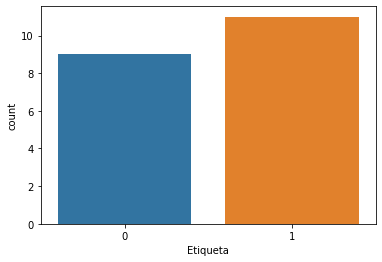

In [230]:
x = data['Etiqueta']
ax = sns.countplot(x=x, data=data)

C:\Users\Juan Jose Restrepo\AppData\Local\Temp\ipykernel_16668\14816604.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


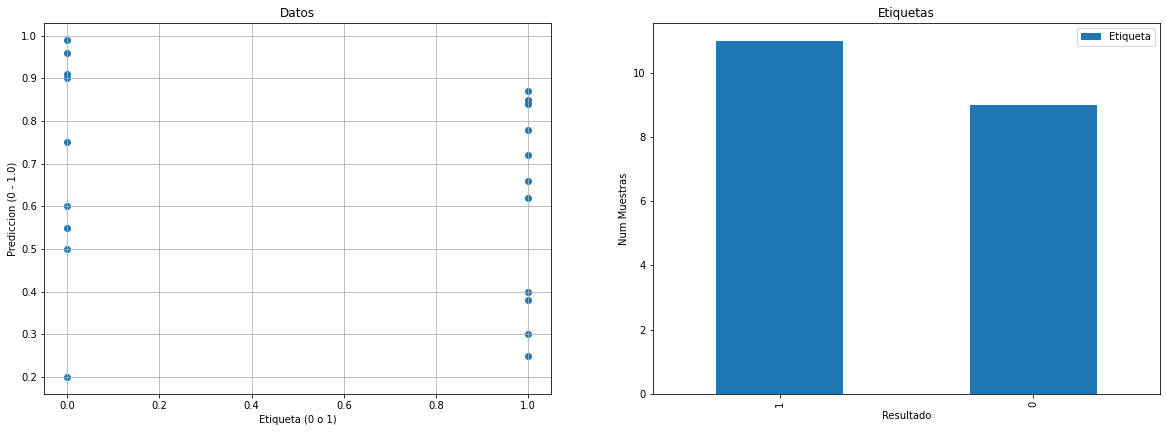

In [231]:
fig= plt.figure(figsize=(20,15))
fig.clf()
ax = fig.subplots(1,1)
plt.subplot(2,2,1)
plt.scatter(data['Etiqueta'], data['Prediccion'] )
plt.xlabel('Etiqueta (0 o 1)')
plt.ylabel('Prediccion (0 - 1.0)')
plt.title('Datos')
plt.grid()

plt.subplot(2,2,2)
data['Etiqueta'].value_counts().plot.bar()
plt.title('Etiquetas')
plt.xlabel('Resultado')
plt.ylabel('Num Muestras')
plt.legend()
plt.show()

Enconder/Codificador de Etiquetas. Como nuestras etiquetas ya están clasificadas en valores numéricos (1 y 0), omitimos este proceso.

In [232]:
le = LabelEncoder()
data['Etiqueta'] = le.fit_transform(data['Etiqueta'])
data.head()

,Muestra #,Etiqueta,Prediccion
0,1,1,0.40
1,2,0,0.90
2,3,1,0.85
3,4,1,0.30
4,5,1,0.87


In [233]:
data.shape

(20, 3)

In [234]:
encoded_data = pd.get_dummies(data)
encoded_data.head()

,Muestra #,Etiqueta,Prediccion
0,1,1,0.40
1,2,0,0.90
2,3,1,0.85
3,4,1,0.30
4,5,1,0.87


In [235]:
encoded_data.shape

(20, 3)

Modelo

In [236]:
y = data['Etiqueta'].values.reshape(-1, 1)
X = encoded_data.drop(['Etiqueta'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Aplicamos Regresión Logística

In [237]:
from sklearn.linear_model import LogisticRegression

log_reg  = LogisticRegression()
#log_reg.fit(X_train, y_train)
log_reg.fit(X_train, y_train.ravel())


LogisticRegression()

In [238]:
y_prob = log_reg.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)

Obtenemos la Matriz de Confusión

In [239]:
matrizConfusion = confusion_matrix(y_test, y_pred)
matrizConfusion

array([[0, 2],
       [0, 2]], dtype=int64)

Obtenemos los FP y TP

In [240]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fp_rate, tp_rate)
print('roc_auc', roc_auc)

Curva_ROC  = roc_auc_score(y_test, y_prob)
print('Curva_ROC', Curva_ROC)

roc_auc 0.25
Curva_ROC 0.25


Graficamos nuestra Curva ROC

In [243]:
def plot_ROC(roc_auc):
    plt.figure(figsize=(7,7))
    plt.title('Curva ROC')
    plt.plot(fp_rate, tp_rate, marker='.', label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis('tight')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='lower right')
    plt.show()

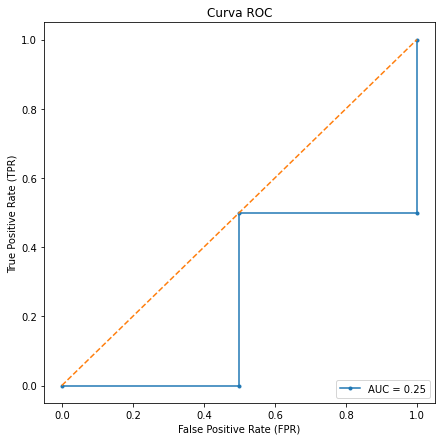

In [244]:
plot_ROC(roc_auc)